<a href="https://colab.research.google.com/github/ProsperChuks/Amazon-Deforestation-from-Space/blob/main/covid_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dependecies

In [ ]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [3]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.5 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px

### Loading the Data

In [5]:
covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

def country_plot(column, country, plot_ma=False, y_max=200):
  try:
    indexer = covid[covid['location'] == country].index
    indexer = indexer.dropna()
    country_tc = covid.loc[indexer, 'date': column]
    country_tc = country_tc.dropna()
    country_tc.set_index('date', inplace=True)
    country_tc.drop(country_tc.columns.difference([column]), axis=1, inplace=True)
    country_tc.plot(figsize=(12, 9), ylim=[0, y_max])
    if plot_ma == True:
      country_tc.rolling(window=30).mean()[column].plot()
  except Exception as e:
    print(e)

### Do Lockdowns Work?


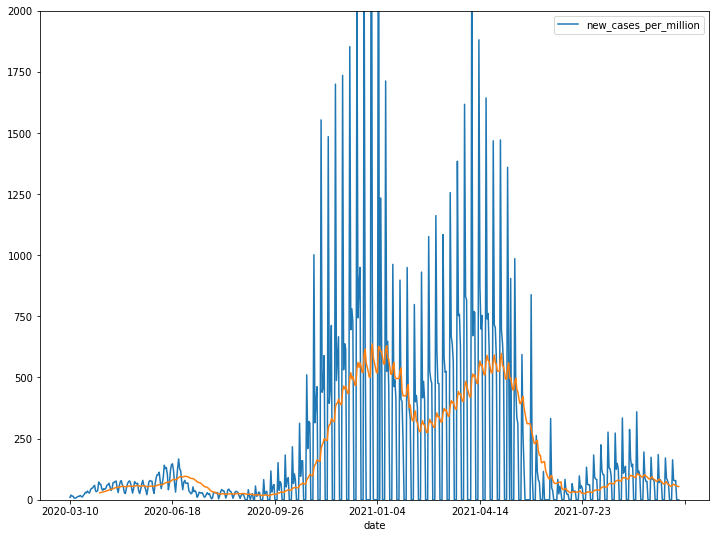

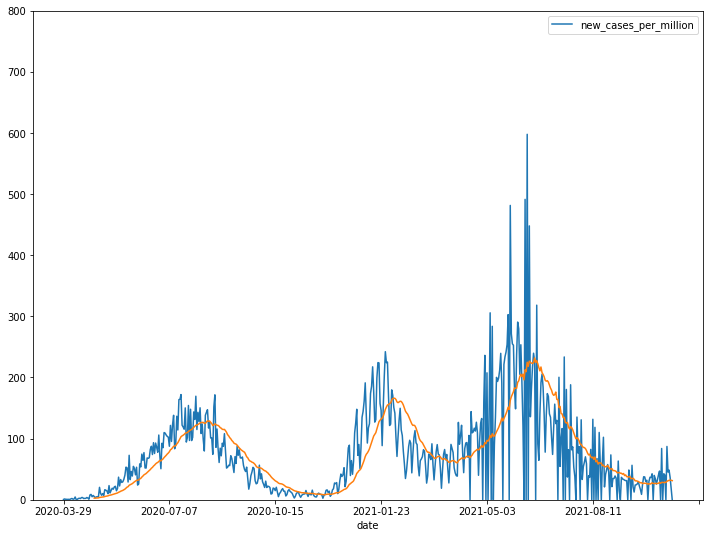

In [6]:
country_plot('new_cases_per_million', 'Sweden', True, 2000)
country_plot('new_cases_per_million', 'Bolivia', True, 800)

### How does Median Age Effect Death Rate?

Japan has a Higher Median age than Serbia but still gets lower number of deaths per million than Serbia

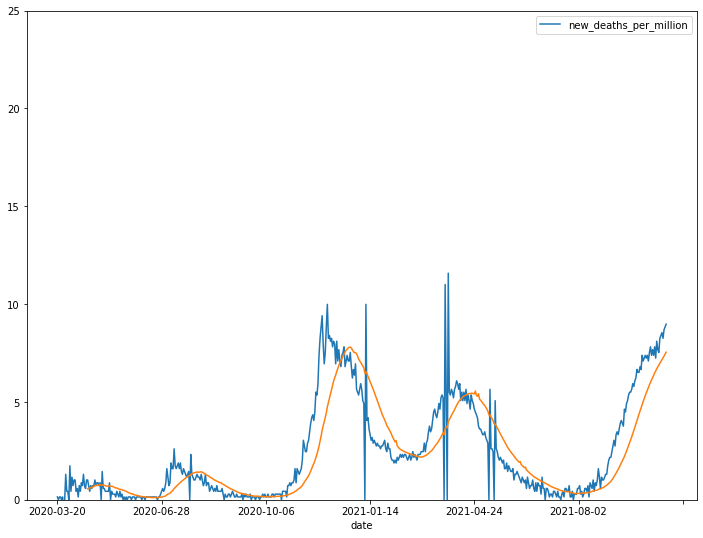

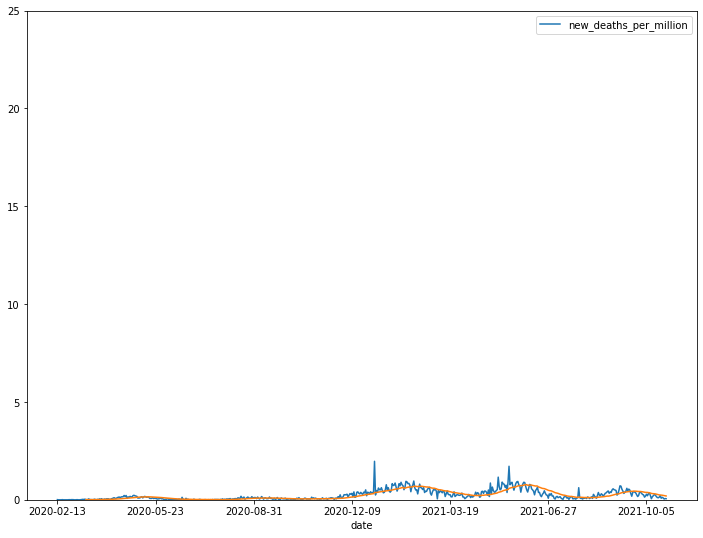

In [7]:
country_plot('new_deaths_per_million', 'Serbia', True, 25)
country_plot('new_deaths_per_million', 'Japan', True, 25)

### How does Obesity Effect Death Rate?

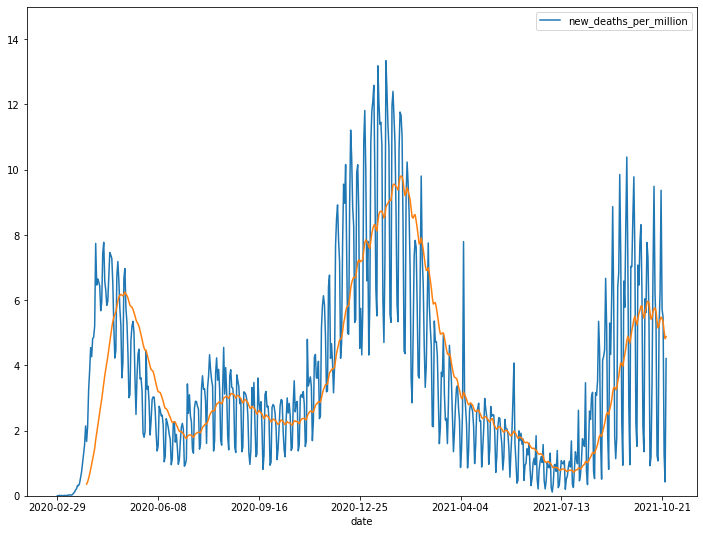

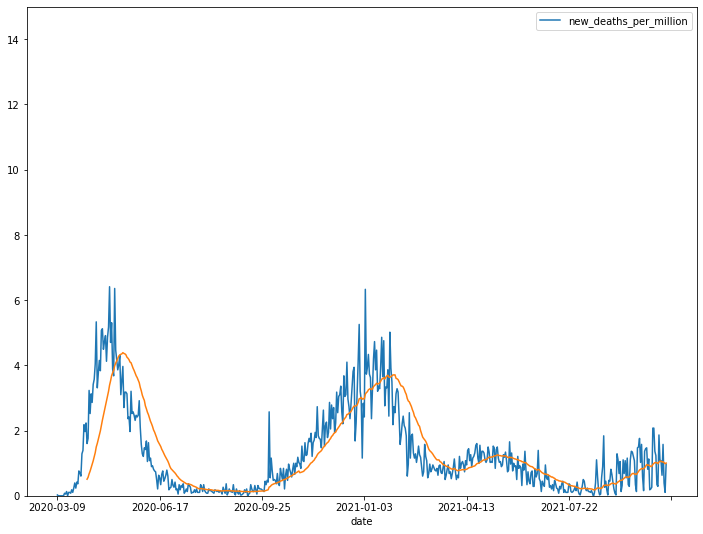

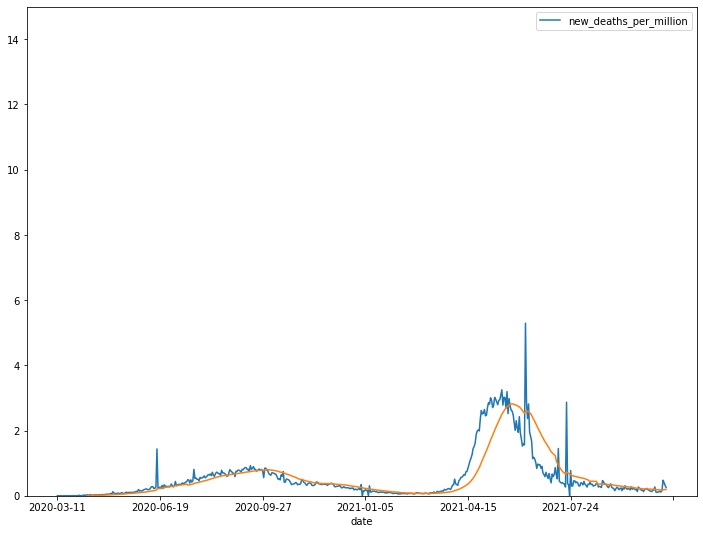

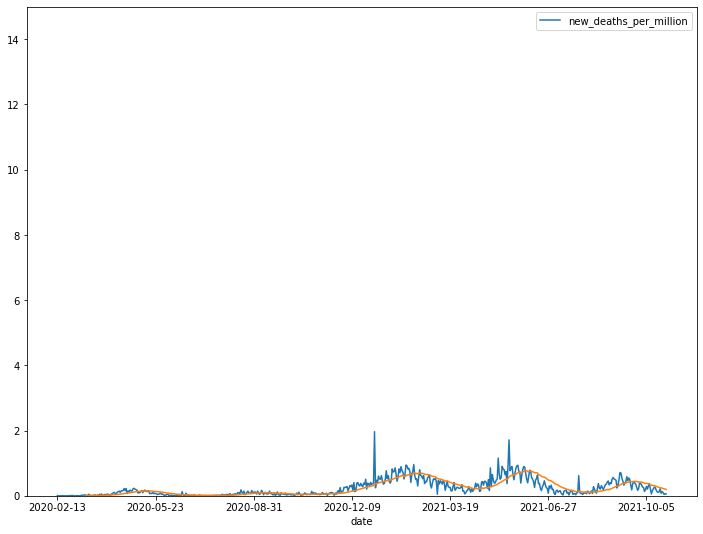

In [8]:
country_plot('new_deaths_per_million', 'United States', True, 15)
country_plot('new_deaths_per_million', 'Canada', True, 15)
country_plot('new_deaths_per_million', 'India', True, 15)
country_plot('new_deaths_per_million', 'Japan', True, 15)

### How does Diabetes Prevalence Effect the death rate?

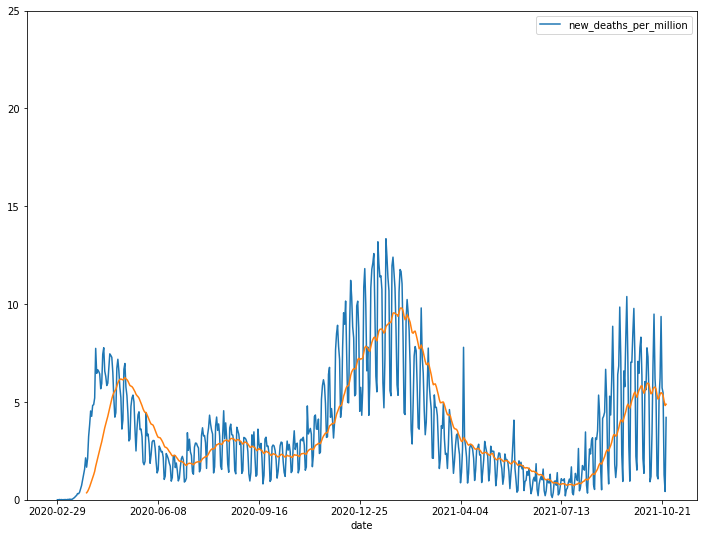

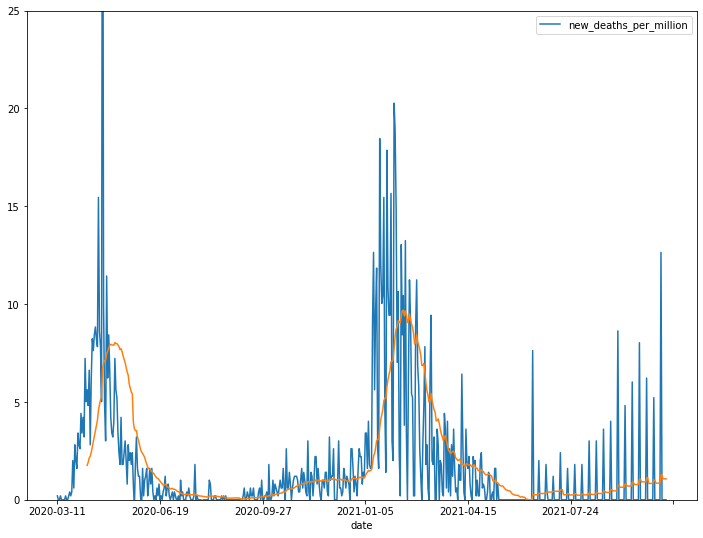

In [9]:
country_plot('new_deaths_per_million', 'United States', True, 25)
country_plot('new_deaths_per_million', 'Ireland', True, 25)

### Does More Testing Control Death Rate?

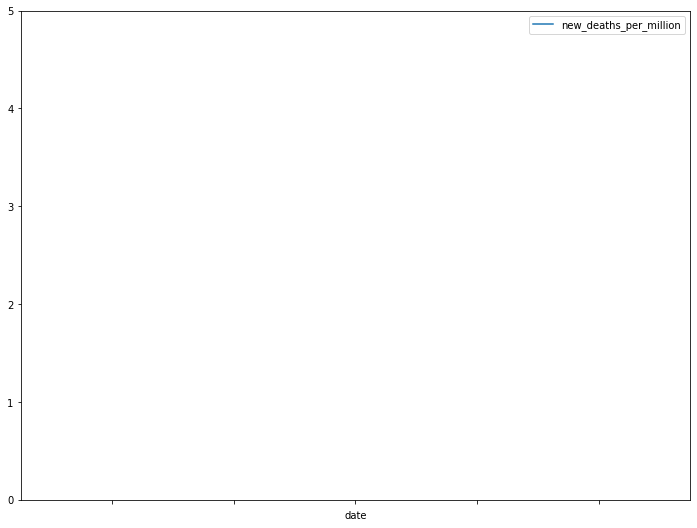

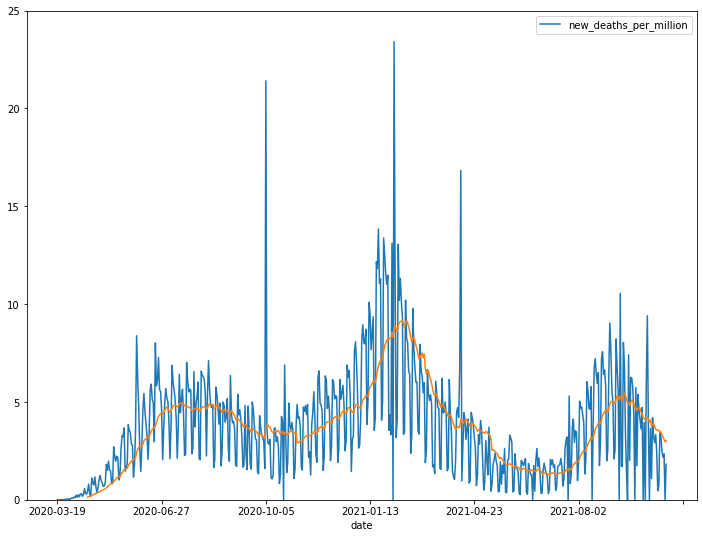

In [10]:
country_plot('new_deaths_per_million', 'Denmak', True, 5)
country_plot('new_deaths_per_million', 'Mexico', True, 25)

### Vaccination

In [11]:
def people_vaccinated(countries, column):
  for country in countries:
    locate = covid[covid['location'] == country].reset_index(drop=True)
    locate.set_index('date', inplace=True)
    fig = px.line(locate, locate.index, y=column,
          labels={'x': 'Date'}, title=country)
    fig.show('svg')

#### Showing the First 4 Countries with Highest Vaccination Rate

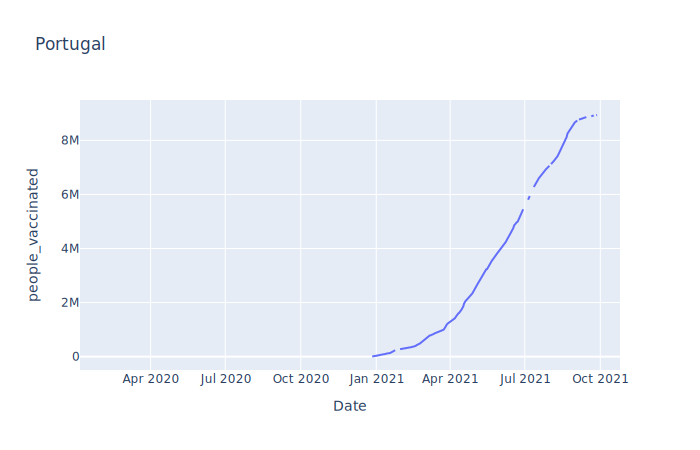

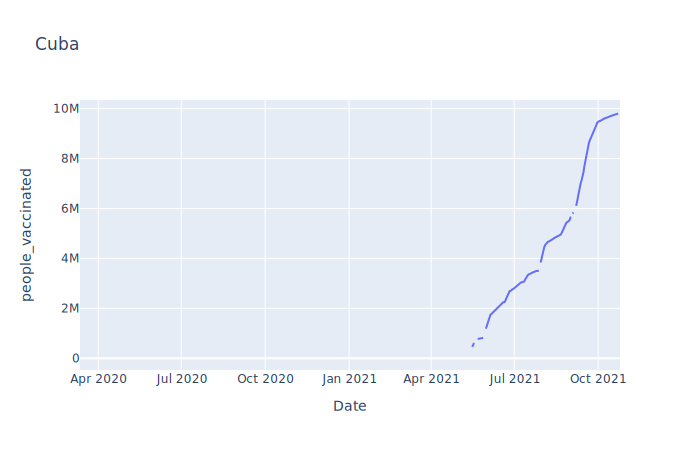

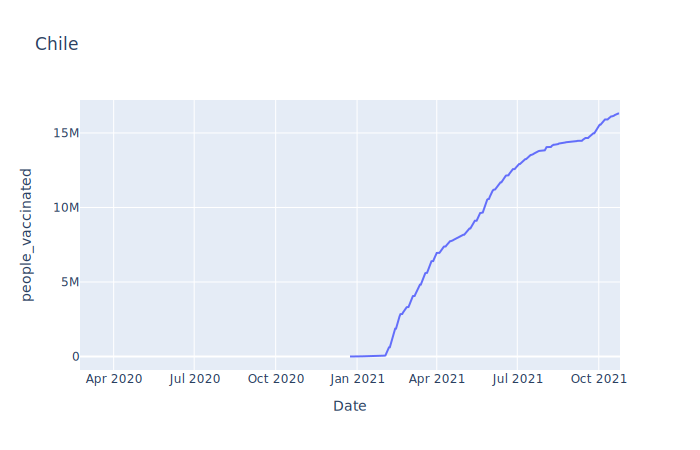

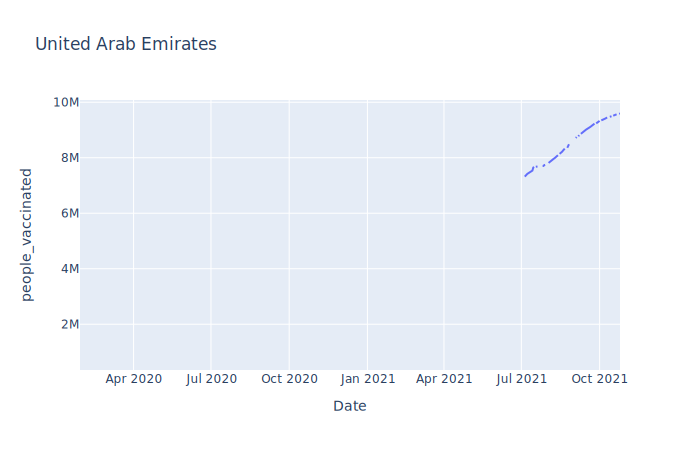

In [12]:
locale = ['Portugal', 'Cuba', 'Chile', 'United Arab Emirates']

people_vaccinated(locale, 'people_vaccinated')

#### Is the Covid Vaccination Lowering the Amount of New Cases?

##### Portugal

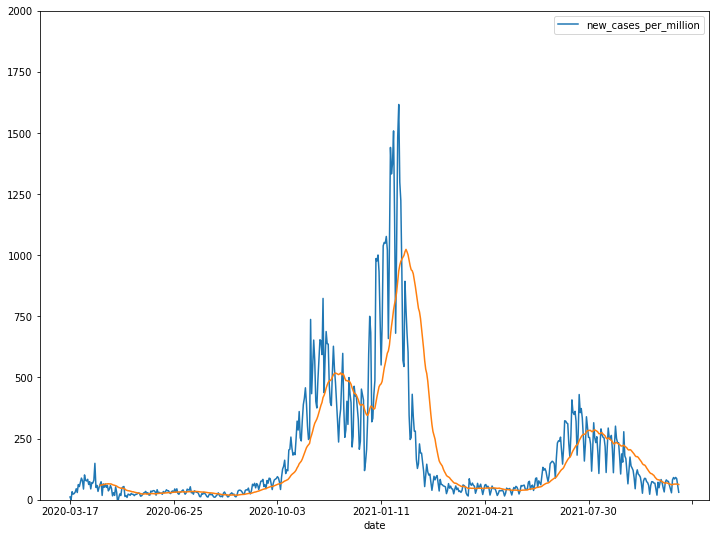

In [13]:
country_plot('new_cases_per_million', 'Portugal', True, 2000)

Portugal began Vaccinating its Citizens on 27th December, 2020

##### Cuba

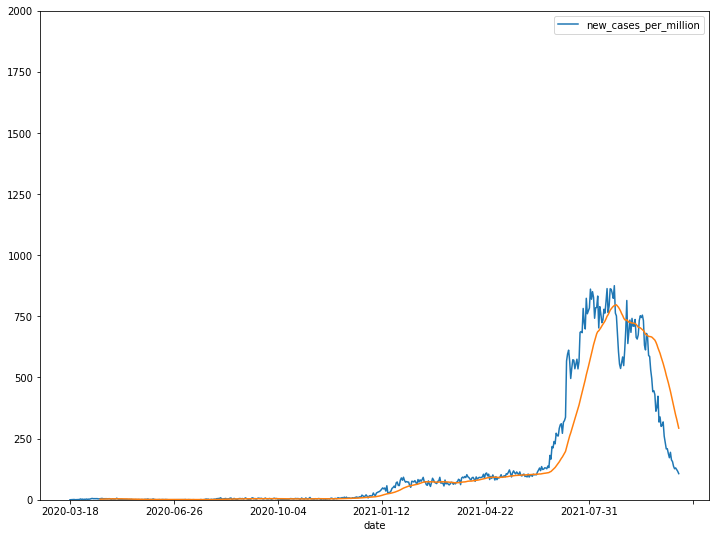

In [14]:
country_plot('new_cases_per_million', 'Cuba', True, 2000)

Cuba began Vaccinating its Citizens on 12th May, 2021

##### Chile

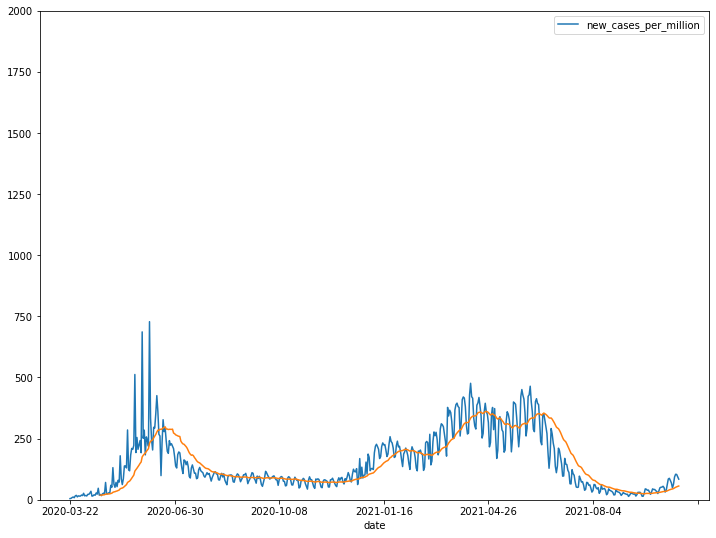

In [15]:
country_plot('new_cases_per_million', 'Chile', True, 2000)

Chile began Vaccinating its Citizens on 24th December, 2020

##### United Arab Emirates

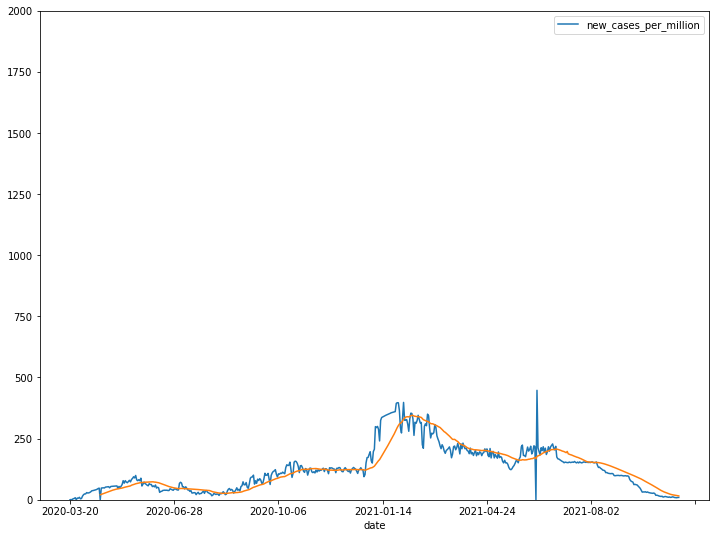

In [16]:
country_plot('new_cases_per_million', 'United Arab Emirates', True, 2000)

UAE began Vaccinating its Citizens on 10th January, 2021

#### Is the Vaccination Controlling the Death Rate?

##### Portugal

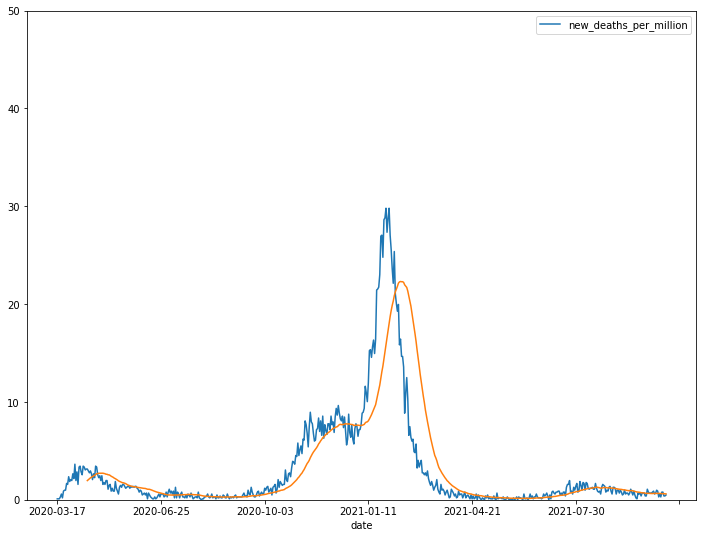

In [17]:
country_plot('new_deaths_per_million', 'Portugal', True, 50)

##### Cuba

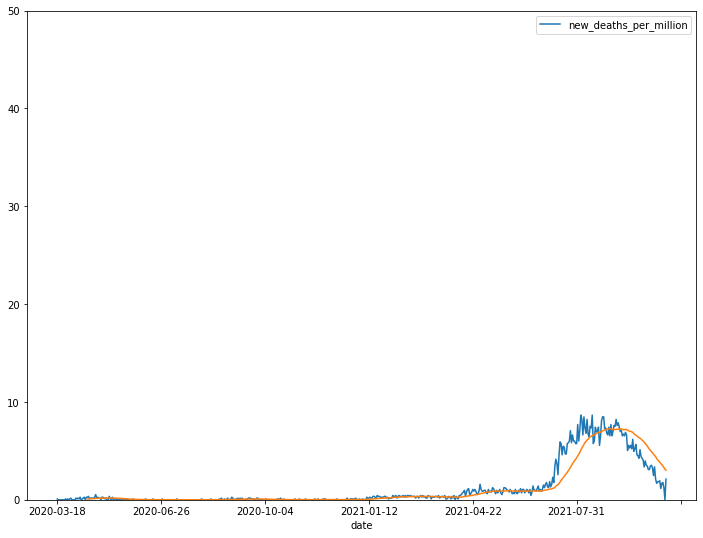

In [18]:
country_plot('new_deaths_per_million', 'Cuba', True, 50)

##### Chile

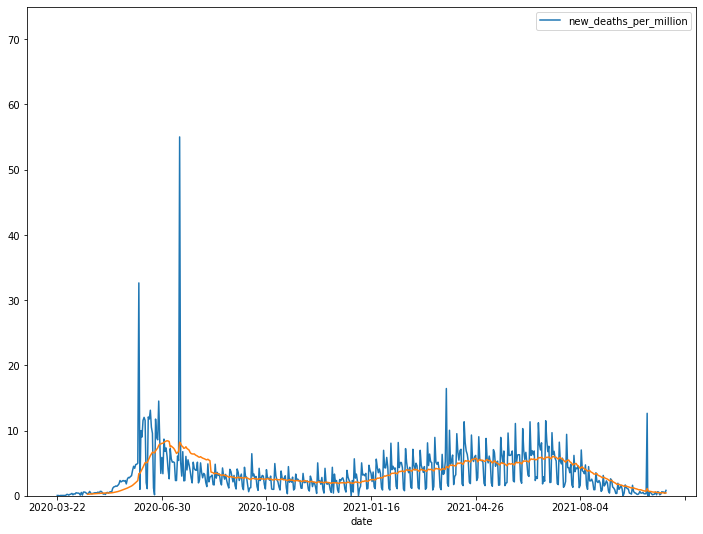

In [19]:
country_plot('new_deaths_per_million', 'Chile', True, 75)

##### UAE

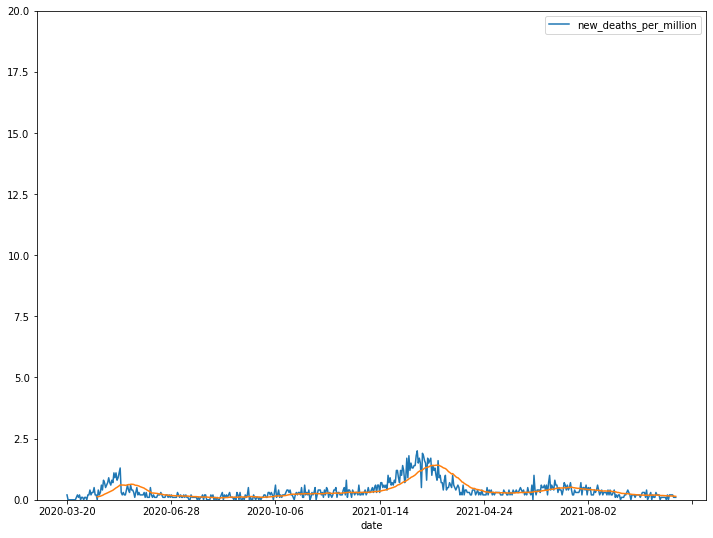

In [20]:
country_plot('new_deaths_per_million', 'United Arab Emirates', True, 20)

### Showing Different Country's Government Response to the Covid Pandemic

In [21]:
country_tc = covid.location.unique()

def scatter_plot(date, col1, col2):
  scatter_df = pd.DataFrame(columns=['date', 'locations', col1, col2])
  for c in country_tc:
    temp = covid[(covid['location'] == c) & 
                 (covid['date'] == date)][['date', 'location', col1, col2]]
    scatter_df = scatter_df.append(temp, ignore_index=True).fillna(0)
  scatter_df.set_index('date', inplace=True)
  fig = px.scatter(scatter_df, col2, col1, color='location',
                    trendline='ols')
  fig.show('svg')

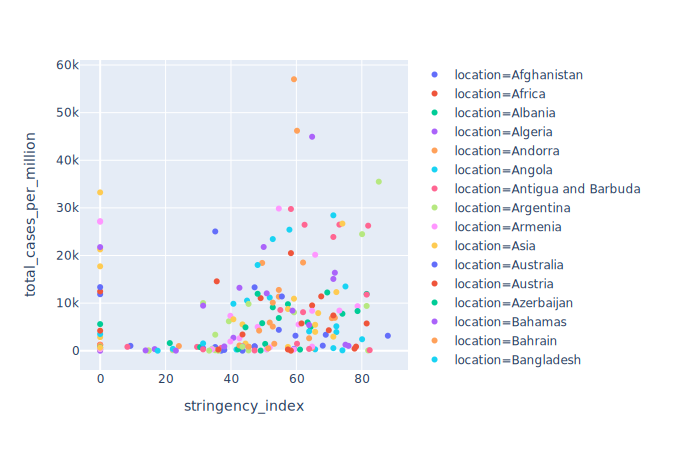

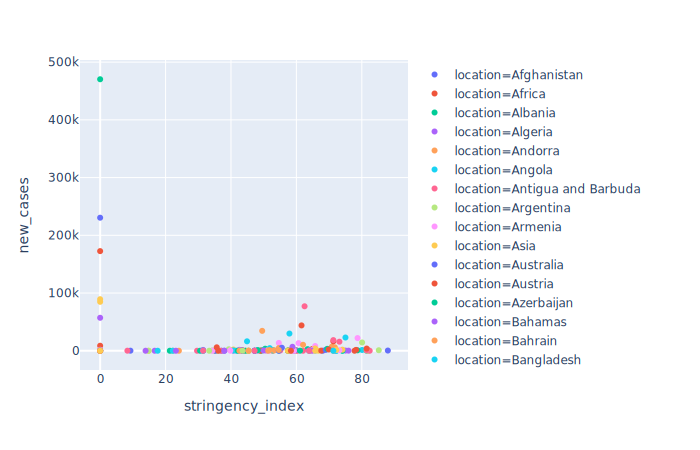

In [22]:
scatter_plot('2020-10-27', 'total_cases_per_million', 'stringency_index')
scatter_plot('2020-10-27', 'new_cases', 'stringency_index')